In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kruskal, mannwhitneyu

In [13]:
df = pd.read_csv('logs2.csv')


knn = df[df['alg'] == 'KNN']['acc'].tolist()

nb = df[df['alg'] == 'NB']['acc'].tolist()
mlp = df[df['alg'] == 'MLP']['acc'].tolist()
ad = df[df['alg'] == 'AD']['acc'].tolist()
svm = df[df['alg'] == 'SVM']['acc'].tolist()
soma = df[df['alg'] == 'Soma']['acc'].tolist()
voto_majoritario = df[df['alg'] == 'VotoMajoritário']['acc'].tolist()
borda_count = df[df['alg'] == 'BordaCount']['acc'].tolist()

print("KNN:", knn)
print("NB:", nb)
print("MLP:", mlp)
print("AD:", ad)
print("SVM:", svm)
print("Soma:", soma)
print("Voto Majoritário:", voto_majoritario)
print("Borda Count:", borda_count)


KNN: [0.8422712933753943, 0.8501577287066246, 0.8391167192429022, 0.8454258675078864, 0.8406940063091483, 0.8438485804416404, 0.8406940063091483, 0.8438485804416404, 0.8438485804416404, 0.8406940063091483, 0.8438485804416404, 0.8406940063091483, 0.8406940063091483, 0.8422712933753943, 0.8438485804416404, 0.8485804416403786, 0.8438485804416404, 0.8470031545741324, 0.8422712933753943, 0.8406940063091483]
NB: [0.0946372239747634, 0.3690851735015772, 0.11198738170347, 0.0899053627760252, 0.1593059936908517, 0.0883280757097791, 0.1750788643533123, 0.7712933753943217, 0.0867507886435331, 0.113564668769716, 0.1214511041009463, 0.2050473186119873, 0.2271293375394321, 0.0804416403785489, 0.1088328075709779, 0.1908517350157728, 0.3675078864353312, 0.1214511041009463, 0.3406940063091482, 0.1498422712933754]
MLP: [0.8359621451104101, 0.8454258675078864, 0.8406940063091483, 0.8249211356466877, 0.8517350157728707, 0.8533123028391167, 0.831230283911672, 0.8485804416403786, 0.8391167192429022, 0.83911

In [14]:
stat, p_value = kruskal(knn, ad, nb, svm, mlp)

print(f"Estatística H: {stat}")
print(f"Valor-p: {p_value}")

if p_value < 0.05:
    print("Rejeitamos H0. Há pelo menos um classificador com desempenho diferente.")
else:
    print("Falha em rejeitar H0. Não há evidência suficiente para afirmar que algum classificador tenha desempenho diferente.")


Estatística H: 61.423122128013695
Valor-p: 1.4566530442931146e-12
Rejeitamos H0. Há pelo menos um classificador com desempenho diferente.


In [64]:
comparacoes = [
    ('KNN vs AD', knn, ad),
    ('KNN vs NB', knn, nb),
    ('KNN vs SVM', knn, svm),
    ('KNN vs MLP', knn, mlp),
    ('AD vs NB', ad, nb),
    ('AD vs SVM', ad, svm),
    ('AD vs MLP', ad, mlp),
    ('NB vs SVM', nb, svm),
    ('NB vs MLP', nb, mlp),
    ('SVM vs MLP', svm, mlp)
]


# Lista para armazenar os resultados
resultados = []

for nome, grupo1, grupo2 in comparacoes:
    stat, p_value = mannwhitneyu(grupo1, grupo2)
    significancia = "Sim" if p_value < 0.05 else "Não"
    resultados.append([nome, stat, p_value, significancia])

# Criar um DataFrame para exibir os resultados
tabela_resultados = pd.DataFrame(resultados, columns=["Comparação", "Estatística U", "Valor-p", "Diferença Significativa"])

# Exibir a tabela
print(tabela_resultados.round(3))

   Comparação  Estatística U  Valor-p Diferença Significativa
0   KNN vs AD          370.0    0.000                     Sim
1   KNN vs NB          400.0    0.000                     Sim
2  KNN vs SVM          306.5    0.004                     Sim
3  KNN vs MLP          264.5    0.081                     Não
4    AD vs NB          400.0    0.000                     Sim
5   AD vs SVM          145.0    0.137                     Não
6   AD vs MLP          108.5    0.014                     Sim
7   NB vs SVM            0.0    0.000                     Sim
8   NB vs MLP            0.0    0.000                     Sim
9  SVM vs MLP          161.5    0.301                     Não


In [21]:
stat, p_value = kruskal(soma, voto_majoritario, borda_count)
print(f"Estatística H: {stat}")
print(f"Valor-p: {p_value}")

if p_value < 0.05:
    print("Rejeitamos H0. Há pelo menos um classificador com desempenho diferente.")
else:
    print("Falha em rejeitar H0. Não há evidência suficiente para afirmar que algum classificador tenha desempenho diferente.")


Estatística H: 40.43695974487369
Valor-p: 1.6566309047038732e-09
Rejeitamos H0. Há pelo menos um classificador com desempenho diferente.


In [22]:
comparacoes = [
    ('Soma vs Voto Majoritário', soma, voto_majoritario),
    ('Soma vs Borda Count', soma, borda_count),
    ('Voto Majoritário vs Borda Count', voto_majoritario, borda_count)
]

# Lista para armazenar os resultados
resultados = []

# Realizar o teste de Mann-Whitney para cada par de classificadores
for nome, grupo1, grupo2 in comparacoes:
    stat, p_value = mannwhitneyu(grupo1, grupo2)
    significancia = "Sim" if p_value < 0.05 else "Não"
    resultados.append([nome, stat, p_value, significancia])

# Criar um DataFrame para exibir os resultados
tabela_resultados = pd.DataFrame(resultados, columns=["Comparação", "Estatística U", "Valor-p", "Diferença Significativa"])

# Exibir a tabela
print(tabela_resultados)

                        Comparação  Estatística U       Valor-p  \
0         Soma vs Voto Majoritário          150.0  1.755955e-01   
1              Soma vs Borda Count          400.0  6.541131e-08   
2  Voto Majoritário vs Borda Count          400.0  6.135377e-08   

  Diferença Significativa  
0                     Não  
1                     Sim  
2                     Sim  


In [19]:

data = pd.read_csv('logs2.csv')

estatisticas = data.groupby('alg')['acc'].agg(['mean', 'std']).reset_index()

print(estatisticas.round(3))


               alg   mean    std
0               AD  0.833  0.007
1       BordaCount  0.679  0.152
2              KNN  0.843  0.003
3              MLP  0.840  0.008
4               NB  0.199  0.163
5              SVM  0.835  0.013
6             Soma  0.842  0.004
7  VotoMajoritário  0.843  0.003


In [44]:
import pandas as pd


arquivos = {
    'KNN': 'log_params_knn.csv',
    'Árvore de Decisão': 'log_params_ad.csv',
    'MLP': 'log_params_mlp.csv',
    'SVM': 'log_params_svm.csv'
}


for classificador, arquivo in arquivos.items():
    df = pd.read_csv(arquivo) 

    if arquivo == 'log_params_mlp.csv':
        df = pd.read_csv(arquivo, delimiter=';')

    moda = df.mode().iloc[0]

    print(classificador,moda,'\n')




KNN i          0
k       36.0
w    uniform
Name: 0, dtype: object 

Árvore de Decisão i                          0
criterion            entropy
max_depth                5.0
min_samples_leaf         3.0
min_samples_split       10.0
splitter              random
Name: 0, dtype: object 

MLP i                  0
arq         [39, 33]
learning    constant
epocas          50.0
func            relu
Name: 0, dtype: object 

SVM i            1
kernel    poly
C            1
Name: 0, dtype: object 



In [72]:

monoliticos = {
    'KNN': sum(knn) / len(knn),
    'NB': sum(nb) / len(nb),
    'MLP': sum(mlp) / len(mlp),
    'AD': sum(ad) / len(ad),
    'SVM': sum(svm) / len(svm)
}

multiclassificadores = {
    'Soma': sum(soma) / len(soma),
    'Voto Majoritário': sum(voto_majoritario) / len(voto_majoritario),
    'Borda Count': sum(borda_count) / len(borda_count)
}

melhor_monolitico = max(monoliticos, key=monoliticos.get)
melhor_multiclassificador = max(multiclassificadores, key=multiclassificadores.get)

print(f"Melhor Monolítico: {melhor_monolitico} - Média: {monoliticos[melhor_monolitico]}")
print(f"Melhor Multi-Classificador: {melhor_multiclassificador} - Média: {multiclassificadores[melhor_multiclassificador]}")



amostra_monolitico = [knn, nb, mlp, ad, svm][list(monoliticos.keys()).index(melhor_monolitico)]
amostra_multiclassificador = [soma, voto_majoritario, borda_count][list(multiclassificadores.keys()).index(melhor_multiclassificador)]

stat, p_value = mannwhitneyu(amostra_monolitico, amostra_multiclassificador, alternative='two-sided')
print(f"Estatística U: {stat}")
print(f"Valor-p: {p_value}")

if p_value < 0.05:
    print("Rejeitamos H0. Há pelo menos um classificador com desempenho diferente.")
else:
    print("Falha em rejeitar H0. Não há evidência suficiente para afirmar que algum classificador tenha desempenho diferente.")

Melhor Monolítico: KNN - Média: 0.843217665615142
Melhor Multi-Classificador: Voto Majoritário - Média: 0.8431388012618294
Estatística U: 181.0
Valor-p: 0.6099547787108119
Falha em rejeitar H0. Não há evidência suficiente para afirmar que algum classificador tenha desempenho diferente.


Classes encontradas: [0. 2. 1.]
Distribuição das classes:
0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64


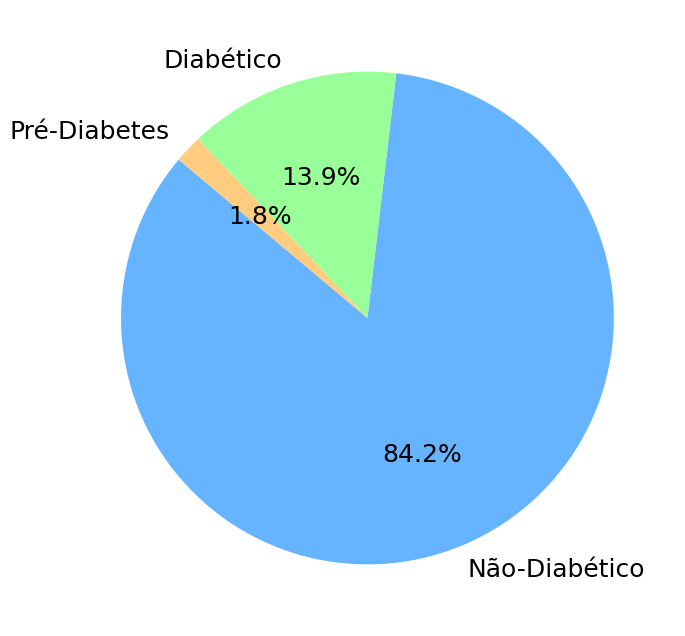

In [74]:
import pandas as pd

df = pd.read_csv('base_de_dados_normalizada.csv')


classes = df['Diabetes_012'].unique()
print(f"Classes encontradas: {classes}")


class_counts = df['Diabetes_012'].value_counts()

print("Distribuição das classes:")
print(class_counts)


import matplotlib.pyplot as plt

custom_labels = ['Não-Diabético', 'Diabético', 'Pré-Diabetes']

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=custom_labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc80'],     textprops={'fontsize': 18})

plt.savefig('dist_class_pie.png')
